In [1]:
import autosignals as sig
import fittingfunctions as fit
import adminfunctions as ad
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.optimize as op
%matplotlib inline

In [2]:
filelist = glob.glob("./spectra/*")
filelist

['./spectra/116Cd_h,a_10deg.txt_zeroed',
 './spectra/116Cd_h,a_20deg.txt_zeroed',
 './spectra/116Cd_h,a_15deg.txt_zeroed',
 './spectra/116Sn_h,a_10deg.txt_zeroed']

reading  ./spectra/116Cd_h,a_10deg.txt_zeroed
successfully read  ./spectra/116Cd_h,a_10deg.txt_zeroed


"\nax.spines['left'].set_position('zero')\nax.spines['bottom'].set_position('zero')\nax.spines['top'].set_visible(False)\nax.spines['right'].set_visible(False)\n\nax.spines['left'].set_smart_bounds(True)\nax.spines['bottom'].set_smart_bounds(True)\n\nax.spines['top'].set_smart_bounds(True)\nax.spines['right'].set_smart_bounds(True)\n"

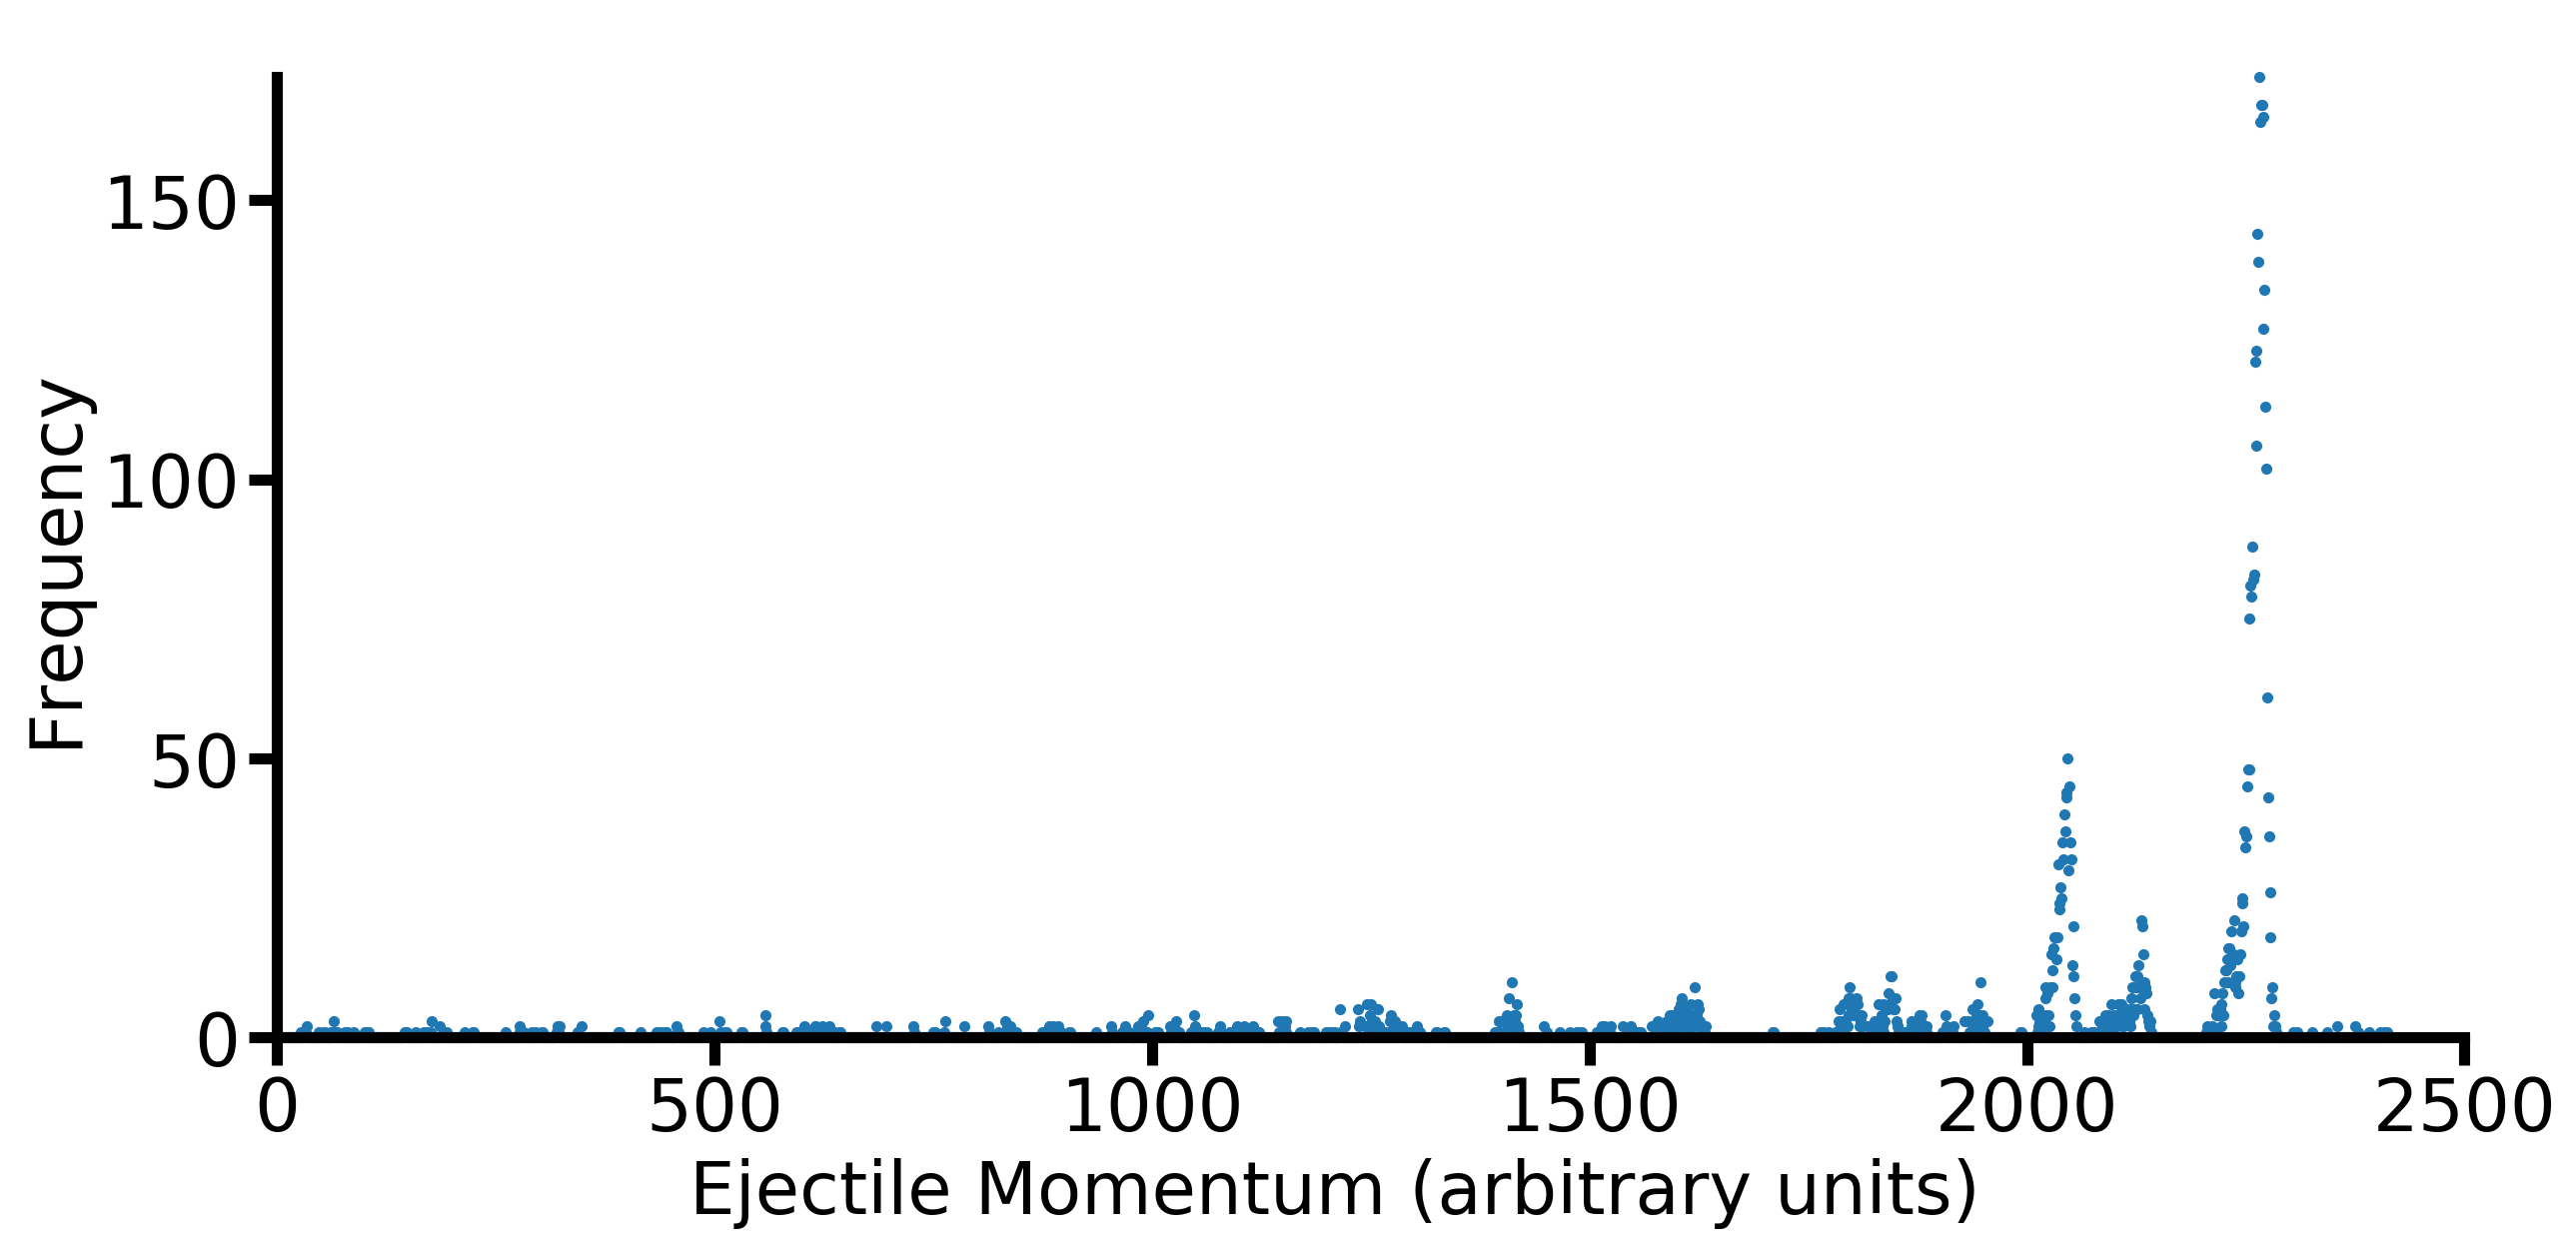

In [3]:
plt.rc('xtick.major', width = 4, size = 10)
plt.rc('ytick.major', width = 4, size = 10)


file = filelist[0]
x, y = ad.file_reader(file)
fig, ax, = plt.subplots(figsize = (15,7), dpi = 200)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

ax.set_xlabel('Ejectile Momentum (arbitrary units)', fontsize = 26)
ax.set_ylabel('Frequency', fontsize = 26)
ax.tick_params(axis="both", labelsize=26)
ax.scatter(x,y, marker = '.')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)

fig.savefig('scatter.png')


'''
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
''''''
ax.spines['top'].set_smart_bounds(True)
ax.spines['right'].set_smart_bounds(True)
'''

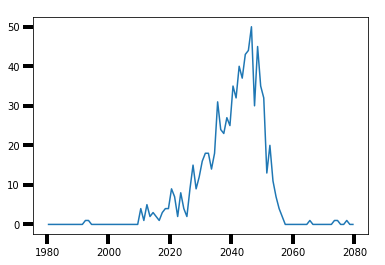

In [4]:
lb = 1980
ub = 2080
y = y[(x < ub) & (x > lb)]
y
x = x[(x < ub) & (x > lb)]
plt.plot(x,y)

[(0.0, None), (1980.5, 2079.5), (0.0, None), (1980.5, 2079.5), (0.0, 10), (0.0, 100), (0.0, None)]


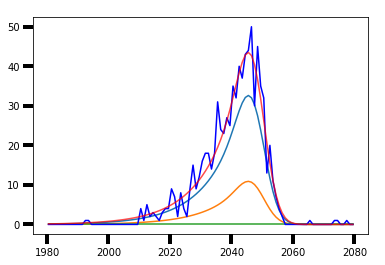

In [5]:
muarr = [ 2038.5,2055.5]
FWHM = 10
sig = FWHM/2.35
ft = fit.fit(x,y,muarr,sig,FWHM, rbfix = False)#,r = 39,beta = 11, rbfix = True)

In [ ]:
ad.printfit(ft, x, y)

In [7]:
print(ft[1])

[ 193.34201039 2053.22124848   11.5128234  2035.31030824    0.
    0.            4.23927478   50.           10.        ]


In [8]:
ft[5].savefig("h,a_2,4_doublet_20.png")

In [9]:
filelist

['./spectra/run562.txt',
 './spectra/116Sn_dp_18deg_600.asc',
 './spectra/run567.txt',
 './spectra/116Cd_p,d_17deg_b3.txt',
 './spectra/116Cd_d,p_10deg_b1.txt',
 './spectra/116Cd_d,p_31deg_b1.txt',
 './spectra/116Cd_d,p_40deg_b1.txt',
 './spectra/116Cd_h,a_10deg.txt',
 './spectra/116Cd_h,a_15deg.txt',
 './spectra/116Cd_h,a_20deg.txt']

In [10]:
file = filelist[-3]
x, y = ad.file_reader(file, delete_0 = False)

reading  ./spectra/116Cd_h,a_10deg.txt
successfully read  ./spectra/116Cd_h,a_10deg.txt


In [11]:
y

array([32.,  3.,  1., ...,  1.,  1.,  1.])

In [12]:
np.sum(y) - y[0]

5966.0

In [13]:
pwd

'/home/ben/Documents/autofit/autofit_script'

In [85]:
# fit same thing in all different spectra

fitlist = []
files = filelist[:3]
print(files)

lb = 2000
ub = 2100

muarr = [ 2035.5, 2049.5 ]

for file in files:
    x, y = ad.file_reader(file)

    y = y[(x < ub) & (x > lb)]
    x = x[(x < ub) & (x > lb)]


    FWHM = 8
    sig = FWHM/2.35
    ft = fit.fit(x,y,muarr,sig,FWHM, posfix = False)#,r = 24,beta = 16, rbfix = True)
    fitlist.append(ft[5])
    ad.printfit(ft, x, y)

['./spectra/116Cd_h,a_10deg.txt_zeroed', './spectra/116Cd_h,a_20deg.txt_zeroed', './spectra/116Cd_h,a_15deg.txt_zeroed']
reading  ./spectra/116Cd_h,a_10deg.txt_zeroed
successfully read  ./spectra/116Cd_h,a_10deg.txt_zeroed
[(0.0, None), (2000.5, 2099.5), (0.0, None), (2000.5, 2099.5), (0.0, 8)]
Fit complete. Fitted channels  2000.5  to  2099.5 , with  2  peak(s).
Width =  4.2 +- 0.4 
R =  50 +- 0 
Beta =  8 +- 0 
Background Gradient 0 +- 0 
Background Offset 0 +- 0 
Reduced chi-squared =  inf
Positions and yields:
[1] 2035 +- 2, 147 +- 39
[2] 2047.1 +- 0.5, 643 +- 44
Press enter to continue
reading  ./spectra/116Cd_h,a_20deg.txt_zeroed
successfully read  ./spectra/116Cd_h,a_20deg.txt_zeroed
[(0.0, None), (2000.5, 2099.5), (0.0, None), (2000.5, 2099.5), (0.0, 8)]
Fit complete. Fitted channels  2000.5  to  2099.5 , with  2  peak(s).
Width =  4.6 +- 0.6 
R =  50 +- 0 
Beta =  8 +- 0 
Background Gradient 0 +- 0 
Background Offset 0 +- 0 
Reduced chi-squared =  inf
Positions and yields:
[1]

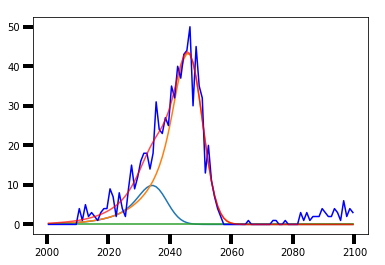

In [86]:
fitlist[0]

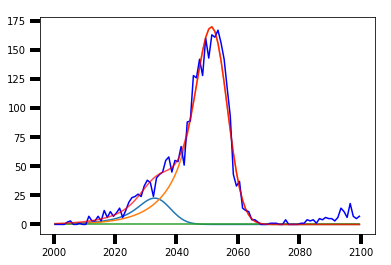

In [87]:
fitlist[1]

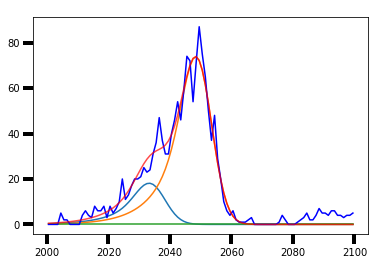

In [88]:
fitlist[2]